In [1]:
import pandas as pd
import numpy as np
pd.set_option('max_columns', 50)

#visualizations
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#feature selection:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE

#classification models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.svm import NuSVC

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

#clustering models
from sklearn.cluster import KMeans

#hyper parameters:
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform
from sklearn.linear_model import Ridge

#feature importance:
import eli5
from eli5.sklearn import PermutationImportance

from sklearn.metrics import auc, roc_auc_score, roc_curve

df = pd.read_csv('datasets_33180_43520_heart.csv')
data = df.copy()
df

C:\Users\Kasia\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Kasia\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
for i in df.columns:
    print(i,len(df[i].unique()))

age 41
sex 2
cp 4
trestbps 49
chol 152
fbs 2
restecg 3
thalach 91
exang 2
oldpeak 40
slope 3
ca 5
thal 4
target 2


In [3]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [4]:
df = df.drop_duplicates()
df.shape

(302, 14)

In [5]:
df.sex.value_counts()

1    206
0     96
Name: sex, dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trestbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalach,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exang,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


# Quick model as a benchmark without preprocessing:

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', 1), df['target'], test_size = 0.2, random_state=14)

model0=LogisticRegression(max_iter=1e8).fit(X_train,y_train)
y_pred0=model0.predict(X_test)

conf0=confusion_matrix(y_test,y_pred0)
display(conf0)

acc0=accuracy_score(y_test,y_pred0).round(3)
rec0=recall_score(y_test,y_pred0).round(3)
pr0=precision_score(y_test,y_pred0).round(3)
f10=f1_score(y_test,y_pred0).round(3)
print(acc0,pr0,rec0,f10)

array([[20, 10],
       [ 4, 27]], dtype=int64)

0.77 0.73 0.871 0.794


In [8]:
# will check the weight of features in this random model, but shouldn't trust it since there are many categorical:
#feature_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
#eli5.show_weights(model0,feature_names = feature_names)

In [9]:
model2=KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train)
y_pred2=model2.predict(X_test)

conf2=confusion_matrix(y_test,y_pred2)
display(conf2)

acc2=accuracy_score(y_test,y_pred2).round(3)
rec2=recall_score(y_test,y_pred2).round(3)
pr2=precision_score(y_test,y_pred2).round(3)
f12=f1_score(y_test,y_pred2).round(3)
print(acc2,pr2,rec2,f12)

array([[20, 10],
       [15, 16]], dtype=int64)

0.59 0.615 0.516 0.561


# Preprocessing

### Preparing data with dummies

In [10]:
a = pd.get_dummies(df['cp'], prefix = "cp", drop_first=True)
b = pd.get_dummies(df['restecg'], prefix = "restecg", drop_first=True)
c = pd.get_dummies(df['slope'], prefix = "slope", drop_first=True)
d = pd.get_dummies(df['thal'], prefix = "thal", drop_first=True)
e = pd.get_dummies(df['ca'], prefix = "ca", drop_first=True)

frames = [df, a, b, c, d, e]
df = pd.concat(frames, axis = 1)

df = df.drop(columns = ['cp', 'restecg', 'slope', 'thal', 'ca'])
df

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,slope_1,slope_2,thal_1,thal_2,thal_3,ca_1,ca_2,ca_3,ca_4
0,63,1,145,233,1,150,0,2.3,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1,37,1,130,250,0,187,0,3.5,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0
2,41,0,130,204,0,172,0,1.4,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0
3,56,1,120,236,0,178,0,0.8,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0
4,57,0,120,354,0,163,1,0.6,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.2,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0
299,45,1,110,264,0,132,0,1.2,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0
300,68,1,144,193,1,141,0,3.4,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0
301,57,1,130,131,0,115,1,1.2,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0


### Splitting data

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', 1), df['target'], test_size = 0.2, random_state=14)

In [12]:
len(y_test)

61

In [13]:
len(y_train)

241

### Scaling

In [14]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_test

array([[ 1.00273131, -1.40545674, -1.3241564 , ...,  2.75810494,
        -0.26666667, -0.09147787],
       [ 0.23556228,  0.71151247, -0.63329219, ..., -0.36256779,
        -0.26666667, -0.09147787],
       [-1.51796695,  0.71151247, -1.20901237, ..., -0.36256779,
        -0.26666667, -0.09147787],
       ...,
       [-0.20282003,  0.71151247,  2.36045272, ..., -0.36256779,
        -0.26666667, -0.09147787],
       [ 0.23556228,  0.71151247, -0.63329219, ..., -0.36256779,
        -0.26666667, -0.09147787],
       [ 0.67394458,  0.71151247,  0.51814816, ..., -0.36256779,
        -0.26666667, -0.09147787]])

### PCA

In [15]:
# PCA

pca=PCA(0.85)
pca.fit(X_train)

pca.explained_variance_ratio_.round(2)

array([0.18, 0.09, 0.07, 0.06, 0.06, 0.06, 0.05, 0.05, 0.05, 0.04, 0.04,
       0.04, 0.04, 0.03])

In [16]:
X_train_pca=pd.DataFrame(pca.transform(X_train), columns=['PC1','PC2','PC3', 'PC4','PC5','PC6', 'PC7', 'PC8','PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14'])
X_test_pca=pd.DataFrame(pca.transform(X_test), columns=['PC1','PC2','PC3', 'PC4','PC5','PC6', 'PC7', 'PC8','PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14'])

#X_train_pca=pd.DataFrame(pca.transform(X_train), columns=['PC1','PC2','PC3', 'PC4','PC5','PC6', 'PC7'])
#X_test_pca=pd.DataFrame(pca.transform(X_test), columns=['PC1','PC2','PC3', 'PC4','PC5','PC6', 'PC7'])

X_train_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,-1.175573,1.629866,-0.738499,0.924190,-1.540157,1.160552,-0.835757,0.775136,-0.433459,-0.211814,0.196848,0.187379,-0.000054,-0.158903
1,-2.038823,0.649354,0.056399,-0.178149,-0.278872,0.022104,-0.068903,-0.171555,0.427485,-0.013956,-1.132261,-1.051150,0.477959,0.234835
2,2.149330,-0.536091,-1.667018,-1.579606,-1.013386,0.824027,1.201987,-0.199091,-0.454032,1.175376,0.895945,0.837310,0.136828,1.806783
3,-0.471129,-2.546379,-0.778628,-0.060647,-1.459063,1.081901,0.497834,0.279686,-0.343779,-0.255246,-0.252244,0.070923,1.225583,0.912209
4,-0.673613,0.545943,0.610072,1.683661,0.968225,0.847747,-0.447793,-0.709223,-1.044371,-0.715485,0.377658,0.105942,-1.902026,0.598821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,-2.668225,-0.398122,0.142322,1.337359,-0.139724,-0.170125,-0.184456,0.009498,-0.254506,-0.405810,-0.288831,0.044407,0.498553,-0.555802
237,0.349484,-1.720966,1.116134,-0.236165,-1.276136,-0.573115,0.130273,0.919014,0.662945,-0.146927,-0.419361,0.432565,0.412977,-1.743771
238,3.670003,-0.407453,-0.079238,1.020309,-0.034689,-1.669997,2.773862,0.618687,0.314249,0.787902,-0.225726,-1.270348,-0.077045,-1.627942
239,2.591549,-0.635424,0.927284,-0.139845,-0.601459,0.920415,0.073936,-0.186205,-0.142109,-0.414534,0.521805,0.116477,-1.695633,-0.920730


# Modeling train and test

### Logistic Regression

In [17]:
# with PCA
# fitting on train:
model1p=LogisticRegression(max_iter=1e8).fit(X_train_pca,y_train)
# testing and scoring on test:
y_pred1p=model1p.predict(X_test_pca)

conf1p=confusion_matrix(y_test,y_pred1p)
display(conf1p)

acc1p=accuracy_score(y_test,y_pred1p).round(3)
rec1p=recall_score(y_test,y_pred1p).round(3)
pr1p=precision_score(y_test,y_pred1p).round(3)
f11p=f1_score(y_test,y_pred1p).round(3)
print(acc1p,pr1p,rec1p,f11p)

array([[23,  7],
       [ 5, 26]], dtype=int64)

0.803 0.788 0.839 0.812


In [18]:
# without PCA
model1=LogisticRegression(max_iter=1e8).fit(X_train,y_train)
# testing and scoring on test:
y_pred1=model1.predict(X_test)

conf1=confusion_matrix(y_test,y_pred1)
display(conf1)

acc1=accuracy_score(y_test,y_pred1).round(3)
rec1=recall_score(y_test,y_pred1).round(3)
pr1=precision_score(y_test,y_pred1).round(3)
f11=f1_score(y_test,y_pred1).round(3)
print(acc1,pr1,rec1,f11)

array([[22,  8],
       [ 4, 27]], dtype=int64)

0.803 0.771 0.871 0.818


0.803 0.771 0.871 0.818
[[22  8]
 [ 4 27]]


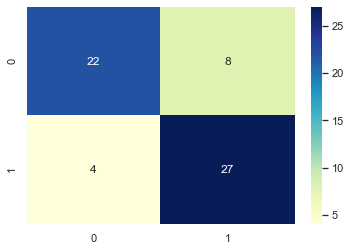

In [19]:
print(acc1,pr1,rec1,f11)
print(confusion_matrix(y_test,y_pred1))
sns.heatmap(confusion_matrix(y_test,y_pred1),annot=True, cmap="YlGnBu")

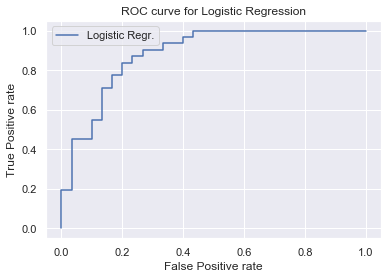

In [20]:
fpr1,tpr1,thresholds1=roc_curve(y_test, model1.predict_proba(X_test)[:,1])
plt.title('ROC curve for Logistic Regression')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.plot(fpr1,tpr1, label=f'Logistic Regr.')
plt.legend()
plt.show()

In [22]:
roc_auc_score(y_test, y_pred1)

0.8021505376344087

In [19]:
# will check the weight of features
feature_names = ['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak', 'cp_1', 'cp_2', 'cp_3', 'restecg_1', 'restecg_2', 'slope_1', 'slope_2', 'thal_1', 'thal_2', 'thal_3', 'ca_1', 'ca_2', 'ca_3', 'ca_4']
eli5.show_weights(model1,feature_names = feature_names)

Weight?,Feature
+0.885,cp_2
+0.730,cp_3
+0.425,cp_1
+0.395,thal_2
+0.304,restecg_1
+0.288,<BIAS>
+0.142,fbs
+0.127,ca_4
+0.112,age
+0.110,thalach


### KNeighbors Classifier

In [24]:
model2=KNeighborsClassifier(n_neighbors=7).fit(X_train,y_train)
y_pred2=model2.predict(X_test)

conf2=confusion_matrix(y_test,y_pred2)
display(conf2)

acc2=accuracy_score(y_test,y_pred2).round(3)
rec2=recall_score(y_test,y_pred2).round(3)
pr2=precision_score(y_test,y_pred2).round(3)
f12=f1_score(y_test,y_pred2).round(3)
print(acc2,pr2,rec2,f12)

array([[23,  7],
       [ 6, 25]], dtype=int64)

0.787 0.781 0.806 0.794


Text(0, 0.5, 'Recall')

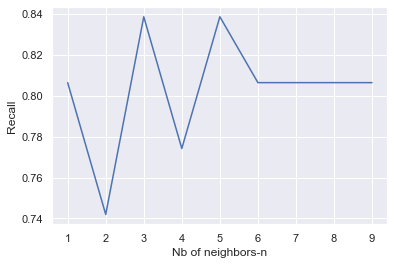

In [25]:
# I will try to find best neighbors number n (targetting recall):

rec_lst = []
for i in range(1,10):
    model2b = KNeighborsClassifier(n_neighbors = i).fit(X_train, y_train)
    y_pred2b=model2b.predict(X_test)
    rec_lst.append(recall_score(y_test, y_pred2b))
    
plt.plot(range(1,10), rec_lst)

plt.xticks(np.arange(1,10,1))
plt.xlabel("Nb of neighbors-n")
plt.ylabel("Recall")


Text(0, 0.5, 'Accuracy')

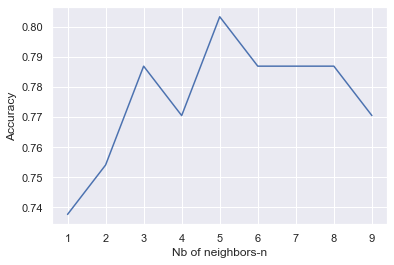

In [26]:
# I will try to find best neighbors number n (targetting accuracy):

acc_lst = []
for i in range(1,10):
    model2a = KNeighborsClassifier(n_neighbors = i).fit(X_train, y_train)
    y_pred2a=model2a.predict(X_test)
    acc_lst.append(accuracy_score(y_test, y_pred2a))
    
plt.plot(range(1,10), acc_lst)

plt.xticks(np.arange(1,10,1))
plt.xlabel("Nb of neighbors-n")
plt.ylabel("Accuracy")


In [27]:
# Conclussion: optimal n is 5

In [28]:
model2=KNeighborsClassifier(n_neighbors=5).fit(X_train,y_train)
y_pred2=model2.predict(X_test)

conf2=confusion_matrix(y_test,y_pred2)
display(conf2)

acc2=accuracy_score(y_test,y_pred2).round(3)
rec2=recall_score(y_test,y_pred2).round(3)
pr2=precision_score(y_test,y_pred2).round(3)
f12=f1_score(y_test,y_pred2).round(3)
print(acc2,pr2,rec2,f12)

array([[23,  7],
       [ 5, 26]], dtype=int64)

0.803 0.788 0.839 0.812


In [29]:
# will check the weight of features for above model:
#feature_names = ['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak', 'cp_1', 'cp_2', 'cp_3', 'restecg_1', 'restecg_2', 'slope_1', 'slope_2', 'thal_1', 'thal_2', 'thal_3', 'ca_1', 'ca_2', 'ca_3', 'ca_4']
#eli5.show_weights(model2,feature_names = feature_names)

In [30]:
# Will try to hyper parameter KNN

knn =KNeighborsClassifier()
params = {'n_neighbors':list(range(3,10,2)),
    'p':[1, 2, 3, 4,5,6,7,8,9,10],
    'leaf_size':list(range(1,20)),
    'weights':['uniform', 'distance']
         }

model = GridSearchCV(knn,params,cv=3, n_jobs=-1, scoring='recall')
model.fit(X_train,y_train)

model.best_params_

{'leaf_size': 1, 'n_neighbors': 9, 'p': 4, 'weights': 'uniform'}

In [31]:
predict = model.predict(X_test)
print('Recall score is: ',recall_score(y_test,y_pred2))
print('Accuracy Score: ',accuracy_score(y_test,predict))


Recall score is:  0.8387096774193549
Accuracy Score:  0.7704918032786885


In [32]:
# with PCA:
model2p=KNeighborsClassifier(n_neighbors=5).fit(X_train_pca,y_train)
y_pred2p=model2p.predict(X_test_pca)

conf2p=confusion_matrix(y_test,y_pred2p)
display(conf2p)

acc2p=accuracy_score(y_test,y_pred2p).round(3)
rec2p=recall_score(y_test,y_pred2p).round(3)
pr2p=precision_score(y_test,y_pred2p).round(3)
f12p=f1_score(y_test,y_pred2).round(3)
print(acc2p,pr2p,rec2p,f12p)


array([[23,  7],
       [ 5, 26]], dtype=int64)

0.803 0.788 0.839 0.812


### XGB Classifier

In [33]:
model3 = XGBClassifier().fit(X_train,y_train)
y_pred3 = model3.predict(X_test)

conf3 = confusion_matrix(y_test,y_pred3)
display(conf3)

acc3 = accuracy_score(y_test,y_pred3).round(3)
rec3 = recall_score(y_test,y_pred3).round(3)
pr3 = precision_score(y_test,y_pred3).round(3)
f13=f1_score(y_test,y_pred3).round(3)

print(acc3,pr3,rec3,f13)

array([[20, 10],
       [ 6, 25]], dtype=int64)

0.738 0.714 0.806 0.758


In [34]:
# with PCA
model3p = XGBClassifier().fit(X_train_pca,y_train)
y_pred3p = model3p.predict(X_test_pca)

conf3p = confusion_matrix(y_test,y_pred3p)
display(conf3p)

acc3p = accuracy_score(y_test,y_pred3p).round(3)
rec3p = recall_score(y_test,y_pred3p).round(3)
pr3p = precision_score(y_test,y_pred3p).round(3)
f13p=f1_score(y_test,y_pred3p).round(3)

print(acc3p,pr3p,rec3p,f13p)

array([[22,  8],
       [ 8, 23]], dtype=int64)

0.738 0.742 0.742 0.742


### Cat Boost

In [35]:
model4 = CatBoostClassifier().fit(X_train,y_train)
y_pred4 = model4.predict(X_test)

conf4 = confusion_matrix(y_test,y_pred4)
display(conf4)

acc4 = accuracy_score(y_test,y_pred4)
rec4 = recall_score(y_test,y_pred4)
pr4 = precision_score(y_test,y_pred4)
f14 = f1_score(y_test,y_pred4)

print(acc4,pr4,rec4,f14)

Learning rate set to 0.0112
0:	learn: 0.6859914	total: 98.1ms	remaining: 1m 38s
1:	learn: 0.6773447	total: 101ms	remaining: 50.3s
2:	learn: 0.6688540	total: 103ms	remaining: 34.3s
3:	learn: 0.6618712	total: 106ms	remaining: 26.4s
4:	learn: 0.6547694	total: 108ms	remaining: 21.6s
5:	learn: 0.6474043	total: 113ms	remaining: 18.6s
6:	learn: 0.6396138	total: 115ms	remaining: 16.4s
7:	learn: 0.6314153	total: 118ms	remaining: 14.6s
8:	learn: 0.6262834	total: 121ms	remaining: 13.3s
9:	learn: 0.6208506	total: 124ms	remaining: 12.3s
10:	learn: 0.6145698	total: 129ms	remaining: 11.6s
11:	learn: 0.6089899	total: 132ms	remaining: 10.9s
12:	learn: 0.6035663	total: 136ms	remaining: 10.3s
13:	learn: 0.5981272	total: 140ms	remaining: 9.83s
14:	learn: 0.5928148	total: 143ms	remaining: 9.36s
15:	learn: 0.5879303	total: 146ms	remaining: 8.95s
16:	learn: 0.5825047	total: 148ms	remaining: 8.58s
17:	learn: 0.5768197	total: 151ms	remaining: 8.26s
18:	learn: 0.5720483	total: 154ms	remaining: 7.97s
19:	learn: 

183:	learn: 0.2499143	total: 598ms	remaining: 2.65s
184:	learn: 0.2495796	total: 602ms	remaining: 2.65s
185:	learn: 0.2484942	total: 605ms	remaining: 2.65s
186:	learn: 0.2482105	total: 607ms	remaining: 2.64s
187:	learn: 0.2470827	total: 610ms	remaining: 2.63s
188:	learn: 0.2466445	total: 612ms	remaining: 2.63s
189:	learn: 0.2455901	total: 616ms	remaining: 2.63s
190:	learn: 0.2446648	total: 619ms	remaining: 2.62s
191:	learn: 0.2437677	total: 621ms	remaining: 2.61s
192:	learn: 0.2430963	total: 624ms	remaining: 2.61s
193:	learn: 0.2421957	total: 626ms	remaining: 2.6s
194:	learn: 0.2416789	total: 629ms	remaining: 2.6s
195:	learn: 0.2410694	total: 633ms	remaining: 2.6s
196:	learn: 0.2402726	total: 636ms	remaining: 2.59s
197:	learn: 0.2394222	total: 638ms	remaining: 2.58s
198:	learn: 0.2385758	total: 641ms	remaining: 2.58s
199:	learn: 0.2380807	total: 644ms	remaining: 2.58s
200:	learn: 0.2373858	total: 647ms	remaining: 2.57s
201:	learn: 0.2362879	total: 649ms	remaining: 2.56s
202:	learn: 0.2

386:	learn: 0.1457242	total: 1.24s	remaining: 1.96s
387:	learn: 0.1454832	total: 1.24s	remaining: 1.95s
388:	learn: 0.1452887	total: 1.24s	remaining: 1.95s
389:	learn: 0.1450130	total: 1.25s	remaining: 1.95s
390:	learn: 0.1446578	total: 1.25s	remaining: 1.95s
391:	learn: 0.1444133	total: 1.25s	remaining: 1.94s
392:	learn: 0.1439403	total: 1.25s	remaining: 1.94s
393:	learn: 0.1436460	total: 1.26s	remaining: 1.94s
394:	learn: 0.1433642	total: 1.26s	remaining: 1.93s
395:	learn: 0.1430632	total: 1.26s	remaining: 1.93s
396:	learn: 0.1427780	total: 1.27s	remaining: 1.93s
397:	learn: 0.1425117	total: 1.27s	remaining: 1.92s
398:	learn: 0.1423784	total: 1.27s	remaining: 1.92s
399:	learn: 0.1421107	total: 1.28s	remaining: 1.92s
400:	learn: 0.1416482	total: 1.28s	remaining: 1.91s
401:	learn: 0.1414050	total: 1.28s	remaining: 1.91s
402:	learn: 0.1413253	total: 1.28s	remaining: 1.9s
403:	learn: 0.1409278	total: 1.29s	remaining: 1.9s
404:	learn: 0.1407004	total: 1.29s	remaining: 1.9s
405:	learn: 0.1

555:	learn: 0.0986492	total: 1.73s	remaining: 1.38s
556:	learn: 0.0983817	total: 1.74s	remaining: 1.38s
557:	learn: 0.0982520	total: 1.74s	remaining: 1.38s
558:	learn: 0.0979801	total: 1.74s	remaining: 1.38s
559:	learn: 0.0976293	total: 1.75s	remaining: 1.37s
560:	learn: 0.0973386	total: 1.75s	remaining: 1.37s
561:	learn: 0.0971290	total: 1.75s	remaining: 1.36s
562:	learn: 0.0969693	total: 1.75s	remaining: 1.36s
563:	learn: 0.0967576	total: 1.76s	remaining: 1.36s
564:	learn: 0.0965870	total: 1.76s	remaining: 1.35s
565:	learn: 0.0963899	total: 1.76s	remaining: 1.35s
566:	learn: 0.0962153	total: 1.76s	remaining: 1.35s
567:	learn: 0.0959347	total: 1.77s	remaining: 1.34s
568:	learn: 0.0957567	total: 1.77s	remaining: 1.34s
569:	learn: 0.0956134	total: 1.77s	remaining: 1.34s
570:	learn: 0.0953330	total: 1.77s	remaining: 1.33s
571:	learn: 0.0951070	total: 1.78s	remaining: 1.33s
572:	learn: 0.0948339	total: 1.78s	remaining: 1.33s
573:	learn: 0.0946363	total: 1.78s	remaining: 1.32s
574:	learn: 

744:	learn: 0.0637248	total: 2.19s	remaining: 751ms
745:	learn: 0.0636088	total: 2.2s	remaining: 748ms
746:	learn: 0.0635150	total: 2.2s	remaining: 745ms
747:	learn: 0.0633616	total: 2.2s	remaining: 742ms
748:	learn: 0.0632301	total: 2.21s	remaining: 739ms
749:	learn: 0.0631220	total: 2.21s	remaining: 736ms
750:	learn: 0.0629419	total: 2.21s	remaining: 733ms
751:	learn: 0.0628719	total: 2.21s	remaining: 730ms
752:	learn: 0.0627731	total: 2.22s	remaining: 727ms
753:	learn: 0.0626555	total: 2.22s	remaining: 724ms
754:	learn: 0.0625112	total: 2.22s	remaining: 721ms
755:	learn: 0.0624061	total: 2.22s	remaining: 718ms
756:	learn: 0.0622826	total: 2.23s	remaining: 715ms
757:	learn: 0.0622043	total: 2.23s	remaining: 712ms
758:	learn: 0.0621065	total: 2.23s	remaining: 709ms
759:	learn: 0.0620267	total: 2.23s	remaining: 706ms
760:	learn: 0.0618435	total: 2.24s	remaining: 703ms
761:	learn: 0.0617257	total: 2.24s	remaining: 700ms
762:	learn: 0.0615397	total: 2.24s	remaining: 696ms
763:	learn: 0.0

920:	learn: 0.0447636	total: 2.69s	remaining: 231ms
921:	learn: 0.0446694	total: 2.69s	remaining: 228ms
922:	learn: 0.0445489	total: 2.7s	remaining: 225ms
923:	learn: 0.0444377	total: 2.71s	remaining: 223ms
924:	learn: 0.0443695	total: 2.71s	remaining: 220ms
925:	learn: 0.0442521	total: 2.71s	remaining: 217ms
926:	learn: 0.0441660	total: 2.72s	remaining: 214ms
927:	learn: 0.0440541	total: 2.73s	remaining: 212ms
928:	learn: 0.0439936	total: 2.73s	remaining: 209ms
929:	learn: 0.0439461	total: 2.73s	remaining: 206ms
930:	learn: 0.0438786	total: 2.74s	remaining: 203ms
931:	learn: 0.0437888	total: 2.74s	remaining: 200ms
932:	learn: 0.0437394	total: 2.74s	remaining: 197ms
933:	learn: 0.0436912	total: 2.75s	remaining: 194ms
934:	learn: 0.0435889	total: 2.75s	remaining: 191ms
935:	learn: 0.0435294	total: 2.75s	remaining: 188ms
936:	learn: 0.0434672	total: 2.76s	remaining: 185ms
937:	learn: 0.0433562	total: 2.76s	remaining: 183ms
938:	learn: 0.0432900	total: 2.76s	remaining: 180ms
939:	learn: 0

array([[22,  8],
       [ 7, 24]], dtype=int64)

0.7540983606557377 0.75 0.7741935483870968 0.7619047619047619


In [36]:
# with PCA
model4p = CatBoostClassifier().fit(X_train_pca,y_train)
y_pred4p = model4p.predict(X_test_pca)

conf4p = confusion_matrix(y_test,y_pred4p)
display(conf4p)

acc4p = accuracy_score(y_test,y_pred4p)
rec4p = recall_score(y_test,y_pred4p)
pr4p = precision_score(y_test,y_pred4p)
f14p = f1_score(y_test,y_pred4p)

print(acc4p,pr4p,rec4p,f14p)

Learning rate set to 0.0112
0:	learn: 0.6837254	total: 6.49ms	remaining: 6.49s
1:	learn: 0.6759525	total: 11.4ms	remaining: 5.68s
2:	learn: 0.6678226	total: 16.1ms	remaining: 5.34s
3:	learn: 0.6604371	total: 20.9ms	remaining: 5.19s
4:	learn: 0.6525655	total: 25ms	remaining: 4.98s
5:	learn: 0.6456110	total: 31.3ms	remaining: 5.18s
6:	learn: 0.6372530	total: 38.3ms	remaining: 5.43s
7:	learn: 0.6297564	total: 43.1ms	remaining: 5.35s
8:	learn: 0.6230007	total: 48.2ms	remaining: 5.31s
9:	learn: 0.6152138	total: 53.5ms	remaining: 5.3s
10:	learn: 0.6097353	total: 59ms	remaining: 5.3s
11:	learn: 0.6024913	total: 63.5ms	remaining: 5.23s
12:	learn: 0.5960080	total: 69.1ms	remaining: 5.25s
13:	learn: 0.5881034	total: 74.9ms	remaining: 5.28s
14:	learn: 0.5815621	total: 79.3ms	remaining: 5.21s
15:	learn: 0.5746605	total: 84.3ms	remaining: 5.18s
16:	learn: 0.5686818	total: 89ms	remaining: 5.14s
17:	learn: 0.5640010	total: 94ms	remaining: 5.13s
18:	learn: 0.5584076	total: 98.7ms	remaining: 5.09s
19:	

160:	learn: 0.2332546	total: 834ms	remaining: 4.34s
161:	learn: 0.2325793	total: 839ms	remaining: 4.34s
162:	learn: 0.2318137	total: 844ms	remaining: 4.33s
163:	learn: 0.2311119	total: 849ms	remaining: 4.33s
164:	learn: 0.2300432	total: 854ms	remaining: 4.32s
165:	learn: 0.2293295	total: 861ms	remaining: 4.33s
166:	learn: 0.2287805	total: 868ms	remaining: 4.33s
167:	learn: 0.2280418	total: 873ms	remaining: 4.32s
168:	learn: 0.2271095	total: 878ms	remaining: 4.32s
169:	learn: 0.2266248	total: 882ms	remaining: 4.31s
170:	learn: 0.2258202	total: 887ms	remaining: 4.3s
171:	learn: 0.2246626	total: 892ms	remaining: 4.29s
172:	learn: 0.2241112	total: 896ms	remaining: 4.28s
173:	learn: 0.2232724	total: 901ms	remaining: 4.28s
174:	learn: 0.2222099	total: 905ms	remaining: 4.27s
175:	learn: 0.2211295	total: 910ms	remaining: 4.26s
176:	learn: 0.2203935	total: 915ms	remaining: 4.25s
177:	learn: 0.2195945	total: 919ms	remaining: 4.24s
178:	learn: 0.2190158	total: 923ms	remaining: 4.23s
179:	learn: 0

328:	learn: 0.1348772	total: 1.67s	remaining: 3.4s
329:	learn: 0.1344617	total: 1.67s	remaining: 3.4s
330:	learn: 0.1342498	total: 1.68s	remaining: 3.39s
331:	learn: 0.1337952	total: 1.68s	remaining: 3.38s
332:	learn: 0.1334789	total: 1.69s	remaining: 3.38s
333:	learn: 0.1331399	total: 1.69s	remaining: 3.37s
334:	learn: 0.1326821	total: 1.7s	remaining: 3.37s
335:	learn: 0.1320869	total: 1.7s	remaining: 3.36s
336:	learn: 0.1316581	total: 1.7s	remaining: 3.35s
337:	learn: 0.1310381	total: 1.71s	remaining: 3.35s
338:	learn: 0.1306873	total: 1.71s	remaining: 3.34s
339:	learn: 0.1302715	total: 1.72s	remaining: 3.33s
340:	learn: 0.1298756	total: 1.72s	remaining: 3.33s
341:	learn: 0.1294060	total: 1.73s	remaining: 3.32s
342:	learn: 0.1289700	total: 1.73s	remaining: 3.31s
343:	learn: 0.1286350	total: 1.73s	remaining: 3.31s
344:	learn: 0.1283355	total: 1.74s	remaining: 3.3s
345:	learn: 0.1278912	total: 1.74s	remaining: 3.29s
346:	learn: 0.1276734	total: 1.75s	remaining: 3.29s
347:	learn: 0.1272

495:	learn: 0.0856646	total: 2.46s	remaining: 2.5s
496:	learn: 0.0854333	total: 2.46s	remaining: 2.5s
497:	learn: 0.0852731	total: 2.47s	remaining: 2.49s
498:	learn: 0.0849157	total: 2.48s	remaining: 2.49s
499:	learn: 0.0847690	total: 2.48s	remaining: 2.48s
500:	learn: 0.0845774	total: 2.49s	remaining: 2.48s
501:	learn: 0.0844115	total: 2.49s	remaining: 2.47s
502:	learn: 0.0841313	total: 2.5s	remaining: 2.47s
503:	learn: 0.0840279	total: 2.5s	remaining: 2.46s
504:	learn: 0.0837479	total: 2.51s	remaining: 2.46s
505:	learn: 0.0834746	total: 2.51s	remaining: 2.45s
506:	learn: 0.0832077	total: 2.52s	remaining: 2.45s
507:	learn: 0.0830522	total: 2.52s	remaining: 2.44s
508:	learn: 0.0827506	total: 2.52s	remaining: 2.43s
509:	learn: 0.0826091	total: 2.53s	remaining: 2.43s
510:	learn: 0.0822806	total: 2.53s	remaining: 2.42s
511:	learn: 0.0821260	total: 2.54s	remaining: 2.42s
512:	learn: 0.0819353	total: 2.54s	remaining: 2.42s
513:	learn: 0.0816827	total: 2.55s	remaining: 2.41s
514:	learn: 0.08

668:	learn: 0.0560975	total: 3.3s	remaining: 1.63s
669:	learn: 0.0558769	total: 3.31s	remaining: 1.63s
670:	learn: 0.0557128	total: 3.31s	remaining: 1.63s
671:	learn: 0.0554901	total: 3.32s	remaining: 1.62s
672:	learn: 0.0553381	total: 3.33s	remaining: 1.62s
673:	learn: 0.0551998	total: 3.33s	remaining: 1.61s
674:	learn: 0.0550404	total: 3.34s	remaining: 1.61s
675:	learn: 0.0548889	total: 3.34s	remaining: 1.6s
676:	learn: 0.0547672	total: 3.35s	remaining: 1.6s
677:	learn: 0.0547226	total: 3.35s	remaining: 1.59s
678:	learn: 0.0546998	total: 3.36s	remaining: 1.59s
679:	learn: 0.0545632	total: 3.37s	remaining: 1.58s
680:	learn: 0.0545053	total: 3.37s	remaining: 1.58s
681:	learn: 0.0543758	total: 3.38s	remaining: 1.57s
682:	learn: 0.0542162	total: 3.38s	remaining: 1.57s
683:	learn: 0.0541446	total: 3.39s	remaining: 1.56s
684:	learn: 0.0539353	total: 3.39s	remaining: 1.56s
685:	learn: 0.0538480	total: 3.42s	remaining: 1.56s
686:	learn: 0.0537185	total: 3.43s	remaining: 1.56s
687:	learn: 0.0

831:	learn: 0.0394380	total: 4.15s	remaining: 838ms
832:	learn: 0.0393643	total: 4.15s	remaining: 833ms
833:	learn: 0.0392870	total: 4.16s	remaining: 828ms
834:	learn: 0.0392437	total: 4.16s	remaining: 823ms
835:	learn: 0.0391671	total: 4.17s	remaining: 818ms
836:	learn: 0.0391056	total: 4.17s	remaining: 813ms
837:	learn: 0.0390277	total: 4.18s	remaining: 808ms
838:	learn: 0.0390086	total: 4.18s	remaining: 803ms
839:	learn: 0.0389266	total: 4.19s	remaining: 798ms
840:	learn: 0.0388548	total: 4.19s	remaining: 793ms
841:	learn: 0.0387831	total: 4.2s	remaining: 788ms
842:	learn: 0.0386673	total: 4.2s	remaining: 783ms
843:	learn: 0.0386241	total: 4.21s	remaining: 778ms
844:	learn: 0.0385317	total: 4.21s	remaining: 773ms
845:	learn: 0.0384466	total: 4.21s	remaining: 767ms
846:	learn: 0.0384288	total: 4.22s	remaining: 762ms
847:	learn: 0.0383497	total: 4.22s	remaining: 757ms
848:	learn: 0.0382495	total: 4.23s	remaining: 752ms
849:	learn: 0.0381259	total: 4.23s	remaining: 747ms
850:	learn: 0.

990:	learn: 0.0299898	total: 5s	remaining: 45.4ms
991:	learn: 0.0299218	total: 5s	remaining: 40.3ms
992:	learn: 0.0298690	total: 5s	remaining: 35.3ms
993:	learn: 0.0298356	total: 5.01s	remaining: 30.3ms
994:	learn: 0.0297961	total: 5.02s	remaining: 25.2ms
995:	learn: 0.0297438	total: 5.03s	remaining: 20.2ms
996:	learn: 0.0296586	total: 5.04s	remaining: 15.2ms
997:	learn: 0.0296353	total: 5.05s	remaining: 10.1ms
998:	learn: 0.0295916	total: 5.05s	remaining: 5.06ms
999:	learn: 0.0295806	total: 5.06s	remaining: 0us


array([[22,  8],
       [ 9, 22]], dtype=int64)

0.7213114754098361 0.7333333333333333 0.7096774193548387 0.7213114754098361


### ADA Boost

In [37]:
model5 = AdaBoostClassifier().fit(X_train,y_train)
y_pred5 = model5.predict(X_test)

conf5 = confusion_matrix(y_test,y_pred5)
display(conf5)

acc5=accuracy_score(y_test,y_pred5).round(3)
rec5=recall_score(y_test,y_pred5).round(3)
pr5=precision_score(y_test,y_pred5).round(3)
f15=f1_score(y_test,y_pred5).round(3)
print(acc5,pr5,rec5,f15)

array([[20, 10],
       [ 5, 26]], dtype=int64)

0.754 0.722 0.839 0.776


In [38]:
#with pca
model5p = AdaBoostClassifier().fit(X_train_pca,y_train)
y_pred5p = model5p.predict(X_test_pca)

conf5p = confusion_matrix(y_test,y_pred5p)
display(conf5p)

acc5p=accuracy_score(y_test,y_pred5p).round(3)
rec5p=recall_score(y_test,y_pred5p).round(3)
pr5p=precision_score(y_test,y_pred5p).round(3)
f15p=f1_score(y_test,y_pred5p).round(3)
print(acc5p,pr5p,rec5p,f15p)

array([[20, 10],
       [ 8, 23]], dtype=int64)

0.705 0.697 0.742 0.719


### Decision Tree

In [39]:
model6 = DecisionTreeClassifier().fit(X_train,y_train)
y_pred6 = model6.predict(X_test)

conf6 = confusion_matrix(y_test,y_pred6)
display(conf6)

acc6=accuracy_score(y_test,y_pred6).round(3)
rec6=recall_score(y_test,y_pred6).round(3)
pr6=precision_score(y_test,y_pred6).round(3)
f16=f1_score(y_test,y_pred6).round(3)
print(acc6,pr6,rec6,f16)

array([[24,  6],
       [ 9, 22]], dtype=int64)

0.754 0.786 0.71 0.746


In [40]:
#with PCA

model6p = DecisionTreeClassifier().fit(X_train_pca,y_train)
y_pred6p = model6p.predict(X_test_pca)

conf6p = confusion_matrix(y_test,y_pred6p)
display(conf6p)

acc6p=accuracy_score(y_test,y_pred6p).round(3)
rec6p=recall_score(y_test,y_pred6p).round(3)
pr6p=precision_score(y_test,y_pred6p).round(3)
f16p=f1_score(y_test,y_pred6p).round(3)
print(acc6p,pr6p,rec6p,f16p)

array([[20, 10],
       [12, 19]], dtype=int64)

0.639 0.655 0.613 0.633


### Random Forest

In [41]:
model7 = RandomForestClassifier().fit(X_train,y_train)
y_pred7 = model7.predict(X_test)

conf7 = confusion_matrix(y_test,y_pred7)
display(conf7)

acc7=accuracy_score(y_test,y_pred7).round(3)
rec7=recall_score(y_test,y_pred7).round(3)
pr7=precision_score(y_test,y_pred7).round(3)
f17=f1_score(y_test,y_pred7).round(3)
print(acc7,pr7,rec7,f17)

array([[20, 10],
       [10, 21]], dtype=int64)

0.672 0.677 0.677 0.677


In [42]:
#with PCA
model7p = RandomForestClassifier().fit(X_train,y_train)
y_pred7p = model7p.predict(X_test)

conf7p = confusion_matrix(y_test,y_pred7p)
display(conf7p)

acc7p=accuracy_score(y_test,y_pred7p).round(3)
rec7p=recall_score(y_test,y_pred7p).round(3)
pr7p=precision_score(y_test,y_pred7p).round(3)
f17p=f1_score(y_test,y_pred7p).round(3)
print(acc7p,pr7p,rec7p,f17p)

array([[23,  7],
       [11, 20]], dtype=int64)

0.705 0.741 0.645 0.69


### Gaussian Naive Bayes

In [43]:
model9 = GaussianNB().fit(X_train,y_train)
y_pred9=model9.predict(X_test)

conf9 = confusion_matrix(y_test,y_pred9)
display(conf9)

acc9=accuracy_score(y_test,y_pred9).round(3)
rec9=recall_score(y_test,y_pred9).round(3)
pr9=precision_score(y_test,y_pred9).round(3)
f19=f1_score(y_test,y_pred9).round(3)
print(acc9,pr9,rec9,f19)

array([[25,  5],
       [19, 12]], dtype=int64)

0.607 0.706 0.387 0.5


In [44]:
model9p = GaussianNB().fit(X_train_pca,y_train)
y_pred9p=model9p.predict(X_test_pca)

conf9p = confusion_matrix(y_test,y_pred9p)
display(conf9p)

acc9p=accuracy_score(y_test,y_pred9p).round(3)
rec9p=recall_score(y_test,y_pred9p).round(3)
pr9p=precision_score(y_test,y_pred9p).round(3)
f19p=f1_score(y_test,y_pred9p).round(3)
print(acc9p,pr9p,rec9p,f19p)

array([[25,  5],
       [ 7, 24]], dtype=int64)

0.803 0.828 0.774 0.8


### NuSVC

In [45]:
model10 = NuSVC(nu=0.1).fit(X_train,y_train)
y_pred10 = model10.predict(X_test)

conf10 = confusion_matrix(y_test,y_pred10)
display(conf10)

acc10=accuracy_score(y_test,y_pred10).round(3)
rec10=recall_score(y_test,y_pred10).round(3)
pr10=precision_score(y_test,y_pred10).round(3)
f110=f1_score(y_test,y_pred10).round(3)
print(acc10,pr10,rec10,f110)

array([[19, 11],
       [ 6, 25]], dtype=int64)

0.721 0.694 0.806 0.746


In [46]:
#with PCA

model10p = NuSVC(nu=0.1).fit(X_train_pca,y_train)
y_pred10p = model10p.predict(X_test_pca)

conf10p = confusion_matrix(y_test,y_pred10)
display(conf10p)

acc10p=accuracy_score(y_test,y_pred10p).round(3)
rec10p=recall_score(y_test,y_pred10p).round(3)
pr10p=precision_score(y_test,y_pred10p).round(3)
f110p=f1_score(y_test,y_pred10p).round(3)
print(acc10p,pr10p,rec10p,f110p)

array([[19, 11],
       [ 6, 25]], dtype=int64)

0.721 0.719 0.742 0.73


# Checking ROC AUC score w/o PCA

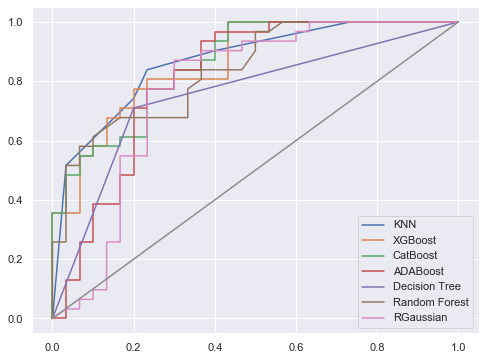

In [47]:
#without PCA:

from sklearn.metrics import auc, roc_auc_score, roc_curve

model_roc1=roc_auc_score(y_test, y_pred1)
model_roc2=roc_auc_score(y_test, y_pred2)
model_roc3=roc_auc_score(y_test, y_pred3)
model_roc4=roc_auc_score(y_test, y_pred4)
model_roc5=roc_auc_score(y_test, y_pred5)
model_roc6=roc_auc_score(y_test, y_pred6)
model_roc7=roc_auc_score(y_test, y_pred7)
#model_roc8=roc_auc_score(y_test, y_pred8)
model_roc9=roc_auc_score(y_test, y_pred9)
model_roc10=roc_auc_score(y_test, y_pred10)


#fpr1,tpr1,thresholds1=roc_curve(y_test, model1.predict_proba(X_test)[:,1])
fpr2,tpr2,thresholds1=roc_curve(y_test, model2.predict_proba(X_test)[:,1])
fpr3,tpr3,thresholds1=roc_curve(y_test, model3.predict_proba(X_test)[:,1])
fpr4,tpr4,thresholds1=roc_curve(y_test, model4.predict_proba(X_test)[:,1])
fpr5,tpr5,thresholds1=roc_curve(y_test, model5.predict_proba(X_test)[:,1])
fpr6,tpr6,thresholds1=roc_curve(y_test, model6.predict_proba(X_test)[:,1])
fpr7,tpr7,thresholds1=roc_curve(y_test, model7.predict_proba(X_test)[:,1])
#fpr8,tpr8,thresholds1=roc_curve(y_test, model8.predict_proba(X_test)[:,1])
fpr9,tpr9,thresholds1=roc_curve(y_test, model9.predict_proba(X_test)[:,1])
#fpr10,tp10,thresholds1=roc_curve(y_test, model10.predict_proba(X_test)[:,1])


plt.figure(figsize=(8,6))
#plt.plot(fpr1,tpr1, label=f'Logistic Regr.')
plt.plot(fpr2,tpr2, label=f'KNN')
plt.plot(fpr3,tpr3, label=f'XGBoost')
plt.plot(fpr4,tpr4, label=f'CatBoost')
plt.plot(fpr5,tpr5, label=f'ADABoost')
plt.plot(fpr6,tpr6, label=f'Decision Tree')
plt.plot(fpr7,tpr7, label=f'Random Forest')
plt.plot(fpr9,tpr9, label=f'RGaussian')
#plt.plot(fpr10,tpr10, label=f'NuSVC')


plt.plot([0,1],[0,1])
plt.legend()
plt.show()

In [48]:
models = [('Logistic Regression', acc1, rec1, pr1, f11, model_roc1),
          ('K-Nearest Neighbors',acc2, rec2, pr2, f12, model_roc2),
          ('XGBoost', acc3, rec3, pr3, f13, model_roc3),
          ('CatBoost', acc4, rec4, pr4, f14, model_roc4),
          ('ADABoost', acc5, rec5, pr5, f15, model_roc5),
          ('Decision Tree', acc6, rec6, pr6, f16, model_roc6),
          ('Random Forest', acc7, rec7, pr7, f17, model_roc7),
          ('Gaussian', acc9, rec9, pr9, f19, model_roc9),
          ('NuSVC', acc10, rec10, pr10, f110, model_roc10)]
           
           
           
models_results = pd.DataFrame(data = models, columns=['Model', 'ACC', 'REC', 'PR', 'F1', 'ROC'])
models_results.sort_values(['REC'], ascending=False)

,Model,ACC,REC,PR,F1,ROC
0,Logistic Regression,0.803000,0.871000,0.771,0.818000,0.802151
1,K-Nearest Neighbors,0.803000,0.839000,0.788,0.812000,0.802688
4,ADABoost,0.754000,0.839000,0.722,0.776000,0.752688
2,XGBoost,0.738000,0.806000,0.714,0.758000,0.736559
8,NuSVC,0.721000,0.806000,0.694,0.746000,0.719892
3,CatBoost,0.754098,0.774194,0.750,0.761905,0.753763
5,Decision Tree,0.754000,0.710000,0.786,0.746000,0.754839
6,Random Forest,0.672000,0.677000,0.677,0.677000,0.672043
7,Gaussian,0.607000,0.387000,0.706,0.500000,0.610215


# Checking ROC AUC score with PCA

In [49]:
model_roc1p=roc_auc_score(y_test, y_pred1p)
model_roc2p=roc_auc_score(y_test, y_pred2p)
model_roc3p=roc_auc_score(y_test, y_pred3p)
model_roc4p=roc_auc_score(y_test, y_pred4p)
model_roc5p=roc_auc_score(y_test, y_pred5p)
model_roc6p=roc_auc_score(y_test, y_pred6p)
model_roc7p=roc_auc_score(y_test, y_pred7p)
#model_roc8=roc_auc_score(y_test, y_pred8)
model_roc9p=roc_auc_score(y_test, y_pred9p)
model_roc10p=roc_auc_score(y_test, y_pred10p)


models = [('Logistic Regression', acc1p, rec1p, pr1p, f11p, model_roc1p),
          ('K-Nearest Neighbors',acc2p, rec2p, pr2p, f12p, model_roc2p),
          ('XGBoost', acc3p, rec3p, pr3p, f13p, model_roc3p),
          ('CatBoost', acc4p, rec4p, pr4p, f14p, model_roc4p),
          ('ADABoost', acc5p, rec5p, pr5p, f15p, model_roc5p),
          ('Decision Tree', acc6p, rec6p, pr6p, f16p, model_roc6p),
          ('Random Forest', acc7p, rec7p, pr7p, f17p, model_roc7p),
          ('Gaussian', acc9p, rec9p, pr9p, f19p, model_roc9p),
          ('NuSVC', acc10p, rec10p, pr10p, f110p, model_roc10p)]
           
           
           
models_results = pd.DataFrame(data = models, columns=['Model', 'ACC', 'REC', 'PR', 'F1', 'ROC'])
models_results.sort_values(['REC'], ascending=False)

,Model,ACC,REC,PR,F1,ROC
0,Logistic Regression,0.803000,0.839000,0.788000,0.812000,0.802688
1,K-Nearest Neighbors,0.803000,0.839000,0.788000,0.812000,0.802688
7,Gaussian,0.803000,0.774000,0.828000,0.800000,0.803763
2,XGBoost,0.738000,0.742000,0.742000,0.742000,0.737634
4,ADABoost,0.705000,0.742000,0.697000,0.719000,0.704301
8,NuSVC,0.721000,0.742000,0.719000,0.730000,0.720968
3,CatBoost,0.721311,0.709677,0.733333,0.721311,0.721505
6,Random Forest,0.705000,0.645000,0.741000,0.690000,0.705914
5,Decision Tree,0.639000,0.613000,0.655000,0.633000,0.639785


# RFE + Clustering + Classification

In [50]:
#df2 = data.copy()
#df2.head()

In [51]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', 1), df['target'], test_size = 0.2, random_state=14)

In [52]:
# RFE:
estimator = LogisticRegression()
selector = RFE(estimator, 4)
selector = selector.fit(X_train,y_train)

X_train.columns[selector.support_]

Index(['cp_1', 'cp_2', 'cp_3', 'thal_2'], dtype='object')

In [53]:
#dropping important features
df_wobestfeatures = df.drop(columns=['cp_1', 'cp_2', 'cp_3', 'thal_2'])
df_wobestfeatures.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,restecg_1,restecg_2,slope_1,slope_2,thal_1,thal_3,ca_1,ca_2,ca_3,ca_4
0,63,1,145,233,1,150,0,2.3,1,0,0,0,0,1,0,0,0,0,0
1,37,1,130,250,0,187,0,3.5,1,1,0,0,0,0,0,0,0,0,0
2,41,0,130,204,0,172,0,1.4,1,0,0,0,1,0,0,0,0,0,0
3,56,1,120,236,0,178,0,0.8,1,1,0,0,1,0,0,0,0,0,0
4,57,0,120,354,0,163,1,0.6,1,1,0,0,1,0,0,0,0,0,0


In [54]:
#Scaling
scaler = StandardScaler()
df_wobestfeatures_scaled = scaler.fit_transform(df_wobestfeatures)

In [55]:
# PCA
pca=PCA(0.85)
pca.fit(df_wobestfeatures_scaled)
pca.explained_variance_ratio_.round(2)

array([0.2 , 0.09, 0.08, 0.07, 0.06, 0.06, 0.06, 0.05, 0.05, 0.04, 0.04,
       0.04, 0.04])

In [56]:
X_pca=pd.DataFrame(pca.transform(df_wobestfeatures_scaled), columns=['PC1','PC2','PC3', 'PC4','PC5','PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13'])

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x0000026F7433F3C8>,
                 k=None, model=None, timings=False)

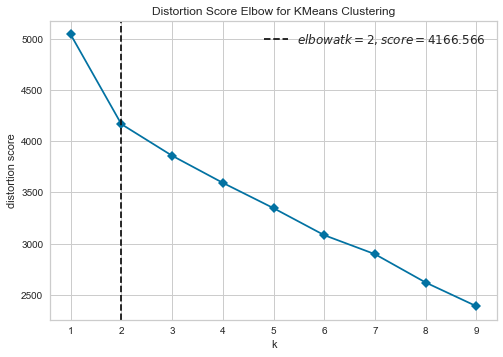

In [57]:
# Elbow:
from yellowbrick.cluster.elbow import kelbow_visualizer
kelbow_visualizer(KMeans(random_state=4), X_pca, k=(1,10),timings=False)

In [58]:
# KMeans
kmeans=KMeans(2)
kmeans=kmeans.fit(X_pca)
df_wobestfeatures['Cluster']=kmeans.predict(X_pca)

from sklearn.metrics import silhouette_score, davies_bouldin_score
print('Model 1. Silhouette score is',silhouette_score(X_pca,kmeans.labels_))
print('Model 1. Davies Bouldin score is',davies_bouldin_score(X_pca,kmeans.labels_))

Model 1. Silhouette score is 0.19465064091794568
Model 1. Davies Bouldin score is 2.0434199752209414


In [59]:
# Concating Cluster with previously selected important features and y

df2 = pd.concat([df_wobestfeatures.Cluster, df.cp_1, df.cp_2, df.cp_3, df.thal_2, df.target], axis=1, sort=False)
dummies_clust = pd.get_dummies(df2.Cluster)

df2 = pd.concat([df2, dummies_clust], axis=1, sort=False)
df2 = df2.drop(columns=["Cluster"])
df2

,cp_1,cp_2,cp_3,thal_2,target,0,1
0,0,0,1,0,1,1,0
1,0,1,0,1,1,0,1
2,1,0,0,1,1,0,1
3,1,0,0,1,1,0,1
4,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...
298,0,0,0,0,0,1,0
299,0,0,1,0,0,1,0
300,0,0,0,0,0,1,0
301,0,0,0,0,0,1,0


In [59]:
# Splitting new data for train and test:
y = df2["target"]
X = df2.drop(["target"],axis = 1)

X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=1/3, random_state=14)

In [60]:
model1c=LogisticRegression(max_iter=1e8, random_state=11).fit(X_train,y_train)
y_pred1c=model1c.predict(X_test)

conf1c=confusion_matrix(y_test,y_pred1c)
display(conf1c)

acc1c=accuracy_score(y_test,y_pred1c).round(3)
rec1c=recall_score(y_test,y_pred1c).round(3)
pr1c=precision_score(y_test,y_pred1c).round(3)
f11c=f1_score(y_test,y_pred1c).round(3)
print(acc1c,pr1c,rec1c,f11c)

array([[40,  6],
       [10, 45]], dtype=int64)

0.842 0.882 0.818 0.849


Text(0, 0.5, 'Recall')

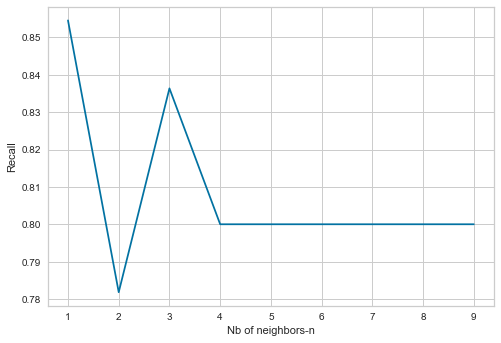

In [61]:
# I will try to find best neighbors number n (targetting recall):

rec_lst = []
for i in range(1,10):
    model2b = KNeighborsClassifier(n_neighbors = i).fit(X_train, y_train)
    y_pred2b=model2b.predict(X_test)
    rec_lst.append(recall_score(y_test, y_pred2b))
    
plt.plot(range(1,10), rec_lst)

plt.xticks(np.arange(1,10,1))
plt.xlabel("Nb of neighbors-n")
plt.ylabel("Recall")


In [62]:
model2c=KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train)
y_pred2c=model2c.predict(X_test)

conf2c=confusion_matrix(y_test,y_pred2c)
display(conf2c)

acc2c=accuracy_score(y_test,y_pred2c).round(3)
rec2c=recall_score(y_test,y_pred2c).round(3)
pr2c=precision_score(y_test,y_pred2c).round(3)
f12c=f1_score(y_test,y_pred2c).round(3)
print(acc2c,pr2c,rec2c,f12c)

array([[40,  6],
       [ 9, 46]], dtype=int64)

0.851 0.885 0.836 0.86


In [63]:
model3c = XGBClassifier(random_state=11).fit(X_train,y_train)
y_pred3c = model3c.predict(X_test)

conf3c = confusion_matrix(y_test,y_pred3c)
display(conf3c)

acc3c = accuracy_score(y_test,y_pred3c).round(3)
rec3c = recall_score(y_test,y_pred3c).round(3)
pr3c = precision_score(y_test,y_pred3c).round(3)
f13c=f1_score(y_test,y_pred3c).round(3)

print(acc3c,pr3c,rec3c,f13c)

array([[38,  8],
       [ 8, 47]], dtype=int64)

0.842 0.855 0.855 0.855


In [64]:
model4c = CatBoostClassifier().fit(X_train,y_train)
y_pred4c = model4c.predict(X_test)

conf4c = confusion_matrix(y_test,y_pred4c)
display(conf4c)

acc4c = accuracy_score(y_test,y_pred4c).round(3)
rec4c = recall_score(y_test,y_pred4c).round(3)
pr4c = precision_score(y_test,y_pred4c).round(3).round(3)
f14c = f1_score(y_test,y_pred4c).round(3)

print(acc4c,pr4c,rec4c,f14c)

Learning rate set to 0.01064
0:	learn: 0.6841722	total: 950us	remaining: 949ms
1:	learn: 0.6751555	total: 1.92ms	remaining: 959ms
2:	learn: 0.6666386	total: 2.73ms	remaining: 909ms
3:	learn: 0.6598923	total: 3.34ms	remaining: 832ms
4:	learn: 0.6534449	total: 4ms	remaining: 797ms
5:	learn: 0.6471561	total: 4.48ms	remaining: 743ms
6:	learn: 0.6411829	total: 4.96ms	remaining: 704ms
7:	learn: 0.6351870	total: 5.63ms	remaining: 698ms
8:	learn: 0.6284847	total: 6.43ms	remaining: 708ms
9:	learn: 0.6209114	total: 7.36ms	remaining: 728ms
10:	learn: 0.6147438	total: 8.14ms	remaining: 732ms
11:	learn: 0.6092338	total: 8.85ms	remaining: 728ms
12:	learn: 0.6038247	total: 9.44ms	remaining: 716ms
13:	learn: 0.5978985	total: 10ms	remaining: 705ms
14:	learn: 0.5935448	total: 10.6ms	remaining: 696ms
15:	learn: 0.5892956	total: 11.2ms	remaining: 688ms
16:	learn: 0.5851488	total: 11.8ms	remaining: 680ms
17:	learn: 0.5805950	total: 12.5ms	remaining: 681ms
18:	learn: 0.5759830	total: 13.2ms	remaining: 680ms

170:	learn: 0.3534711	total: 124ms	remaining: 599ms
171:	learn: 0.3533001	total: 124ms	remaining: 597ms
172:	learn: 0.3529427	total: 125ms	remaining: 596ms
173:	learn: 0.3526220	total: 126ms	remaining: 596ms
174:	learn: 0.3525286	total: 126ms	remaining: 594ms
175:	learn: 0.3522728	total: 127ms	remaining: 594ms
176:	learn: 0.3520266	total: 128ms	remaining: 593ms
177:	learn: 0.3516313	total: 128ms	remaining: 592ms
178:	learn: 0.3513653	total: 129ms	remaining: 591ms
179:	learn: 0.3510391	total: 130ms	remaining: 591ms
180:	learn: 0.3507690	total: 131ms	remaining: 591ms
181:	learn: 0.3506099	total: 131ms	remaining: 590ms
182:	learn: 0.3505294	total: 132ms	remaining: 588ms
183:	learn: 0.3504150	total: 132ms	remaining: 586ms
184:	learn: 0.3502415	total: 133ms	remaining: 584ms
185:	learn: 0.3497794	total: 133ms	remaining: 583ms
186:	learn: 0.3496546	total: 134ms	remaining: 581ms
187:	learn: 0.3494417	total: 134ms	remaining: 581ms
188:	learn: 0.3492143	total: 135ms	remaining: 580ms
189:	learn: 

356:	learn: 0.3306372	total: 253ms	remaining: 455ms
357:	learn: 0.3305719	total: 253ms	remaining: 454ms
358:	learn: 0.3305566	total: 254ms	remaining: 453ms
359:	learn: 0.3305308	total: 255ms	remaining: 453ms
360:	learn: 0.3304919	total: 255ms	remaining: 452ms
361:	learn: 0.3303980	total: 256ms	remaining: 452ms
362:	learn: 0.3303057	total: 257ms	remaining: 452ms
363:	learn: 0.3302699	total: 258ms	remaining: 451ms
364:	learn: 0.3302470	total: 259ms	remaining: 450ms
365:	learn: 0.3302295	total: 259ms	remaining: 449ms
366:	learn: 0.3301648	total: 260ms	remaining: 449ms
367:	learn: 0.3301272	total: 261ms	remaining: 449ms
368:	learn: 0.3301106	total: 262ms	remaining: 448ms
369:	learn: 0.3300414	total: 262ms	remaining: 447ms
370:	learn: 0.3300080	total: 263ms	remaining: 446ms
371:	learn: 0.3299818	total: 264ms	remaining: 445ms
372:	learn: 0.3299657	total: 264ms	remaining: 444ms
373:	learn: 0.3298800	total: 266ms	remaining: 444ms
374:	learn: 0.3298394	total: 267ms	remaining: 444ms
375:	learn: 

548:	learn: 0.3258353	total: 385ms	remaining: 316ms
549:	learn: 0.3258042	total: 385ms	remaining: 315ms
550:	learn: 0.3257954	total: 386ms	remaining: 315ms
551:	learn: 0.3257828	total: 387ms	remaining: 314ms
552:	learn: 0.3257730	total: 388ms	remaining: 314ms
553:	learn: 0.3257565	total: 389ms	remaining: 313ms
554:	learn: 0.3257503	total: 389ms	remaining: 312ms
555:	learn: 0.3257340	total: 390ms	remaining: 312ms
556:	learn: 0.3257245	total: 391ms	remaining: 311ms
557:	learn: 0.3256945	total: 392ms	remaining: 310ms
558:	learn: 0.3256929	total: 392ms	remaining: 310ms
559:	learn: 0.3256633	total: 393ms	remaining: 309ms
560:	learn: 0.3256405	total: 394ms	remaining: 308ms
561:	learn: 0.3256346	total: 395ms	remaining: 307ms
562:	learn: 0.3256226	total: 395ms	remaining: 307ms
563:	learn: 0.3256165	total: 396ms	remaining: 306ms
564:	learn: 0.3255940	total: 397ms	remaining: 305ms
565:	learn: 0.3255654	total: 397ms	remaining: 305ms
566:	learn: 0.3255625	total: 398ms	remaining: 304ms
567:	learn: 

734:	learn: 0.3237217	total: 517ms	remaining: 186ms
735:	learn: 0.3237100	total: 517ms	remaining: 186ms
736:	learn: 0.3237038	total: 518ms	remaining: 185ms
737:	learn: 0.3237032	total: 519ms	remaining: 184ms
738:	learn: 0.3236916	total: 520ms	remaining: 184ms
739:	learn: 0.3236801	total: 521ms	remaining: 183ms
740:	learn: 0.3236771	total: 521ms	remaining: 182ms
741:	learn: 0.3236742	total: 522ms	remaining: 181ms
742:	learn: 0.3236704	total: 522ms	remaining: 181ms
743:	learn: 0.3236609	total: 523ms	remaining: 180ms
744:	learn: 0.3236550	total: 524ms	remaining: 179ms
745:	learn: 0.3236517	total: 525ms	remaining: 179ms
746:	learn: 0.3236448	total: 525ms	remaining: 178ms
747:	learn: 0.3236335	total: 526ms	remaining: 177ms
748:	learn: 0.3236224	total: 527ms	remaining: 177ms
749:	learn: 0.3236146	total: 528ms	remaining: 176ms
750:	learn: 0.3236069	total: 529ms	remaining: 175ms
751:	learn: 0.3236062	total: 529ms	remaining: 175ms
752:	learn: 0.3235953	total: 531ms	remaining: 174ms
753:	learn: 

921:	learn: 0.3225092	total: 651ms	remaining: 55.1ms
922:	learn: 0.3225044	total: 652ms	remaining: 54.4ms
923:	learn: 0.3224997	total: 653ms	remaining: 53.7ms
924:	learn: 0.3224950	total: 654ms	remaining: 53ms
925:	learn: 0.3224903	total: 655ms	remaining: 52.3ms
926:	learn: 0.3224856	total: 656ms	remaining: 51.6ms
927:	learn: 0.3224810	total: 656ms	remaining: 50.9ms
928:	learn: 0.3224763	total: 657ms	remaining: 50.2ms
929:	learn: 0.3224717	total: 658ms	remaining: 49.5ms
930:	learn: 0.3224671	total: 659ms	remaining: 48.8ms
931:	learn: 0.3224626	total: 660ms	remaining: 48.1ms
932:	learn: 0.3224580	total: 661ms	remaining: 47.4ms
933:	learn: 0.3224535	total: 661ms	remaining: 46.7ms
934:	learn: 0.3224490	total: 662ms	remaining: 46ms
935:	learn: 0.3224445	total: 663ms	remaining: 45.3ms
936:	learn: 0.3224400	total: 664ms	remaining: 44.6ms
937:	learn: 0.3224355	total: 664ms	remaining: 43.9ms
938:	learn: 0.3224311	total: 666ms	remaining: 43.2ms
939:	learn: 0.3224267	total: 667ms	remaining: 42.6

array([[36, 10],
       [ 6, 49]], dtype=int64)

0.842 0.831 0.891 0.86


In [65]:
model5c = AdaBoostClassifier().fit(X_train,y_train)
y_pred5c = model5c.predict(X_test)

conf5c = confusion_matrix(y_test,y_pred5c)
display(conf5c)

acc5c=accuracy_score(y_test,y_pred5c).round(3)
rec5c=recall_score(y_test,y_pred5c).round(3)
pr5c=precision_score(y_test,y_pred5c).round(3)
f15c=f1_score(y_test,y_pred5c).round(3)
print(acc5c,pr5c,rec5c,f15c)

array([[38,  8],
       [ 8, 47]], dtype=int64)

0.842 0.855 0.855 0.855


In [66]:
model6c = DecisionTreeClassifier().fit(X_train,y_train)
y_pred6c = model6c.predict(X_test)

conf6c = confusion_matrix(y_test,y_pred6c)
display(conf6c)

acc6c=accuracy_score(y_test,y_pred6c).round(3)
rec6c=recall_score(y_test,y_pred6c).round(3)
pr6c=precision_score(y_test,y_pred6c).round(3)
f16c=f1_score(y_test,y_pred6c).round(3)
print(acc6c,pr6c,rec6c,f16c)

array([[36, 10],
       [ 6, 49]], dtype=int64)

0.842 0.831 0.891 0.86


In [67]:
model7c = RandomForestClassifier().fit(X_train,y_train)
y_pred7c = model7c.predict(X_test)

conf7c = confusion_matrix(y_test,y_pred7c)
display(conf7c)

acc7c=accuracy_score(y_test,y_pred7c).round(3)
rec7c=recall_score(y_test,y_pred7c).round(3)
pr7c=precision_score(y_test,y_pred7c).round(3)
f17c=f1_score(y_test,y_pred7c).round(3)
print(acc7c,pr7c,rec7c,f17c)

array([[36, 10],
       [ 6, 49]], dtype=int64)

0.842 0.831 0.891 0.86


In [68]:
model9c = GaussianNB().fit(X_train,y_train)
y_pred9c=model9c.predict(X_test)

conf9c = confusion_matrix(y_test,y_pred9c)
display(conf9c)

acc9c=accuracy_score(y_test,y_pred9c).round(3)
rec9c=recall_score(y_test,y_pred9c).round(3)
pr9c=precision_score(y_test,y_pred9c).round(3)
f19c=f1_score(y_test,y_pred9c).round(3)
print(acc9c,pr9c,rec9c,f19c)

array([[35, 11],
       [ 4, 51]], dtype=int64)

0.851 0.823 0.927 0.872


In [69]:
confusion_matrix(y_train,model9c.predict(X_train))

array([[ 70,  22],
       [  7, 102]], dtype=int64)

0.851 0.823 0.927 0.872
[[35 11]
 [ 4 51]]


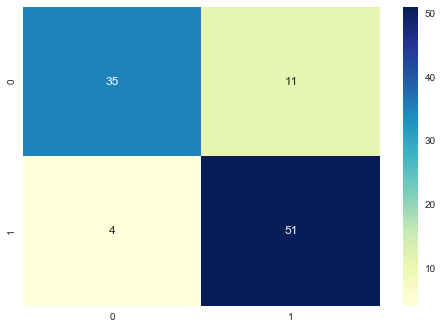

In [70]:
print(acc9c,pr9c,rec9c,f19c)
print(confusion_matrix(y_test,y_pred9c))
sns.heatmap(confusion_matrix(y_test,y_pred9c),annot=True, cmap="YlGnBu")

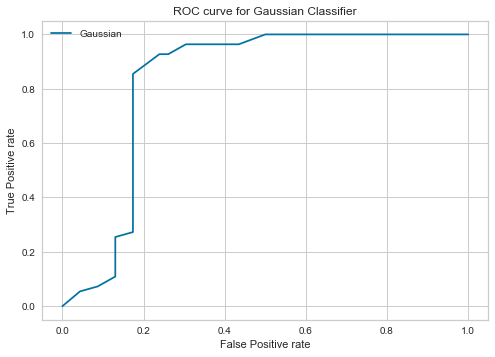

In [71]:
model_roc9c=roc_auc_score(y_test, y_pred9c)
fpr9c,tpr9c,thresholds1=roc_curve(y_test, model9c.predict_proba(X_test)[:,1])
plt.title('ROC curve for Gaussian Classifier')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.plot(fpr9c,tpr9c, label=f'Gaussian')
plt.legend()
plt.show()

In [72]:
model10c = NuSVC(nu=0.1).fit(X_train,y_train)
y_pred10c = model10c.predict(X_test)

conf10c = confusion_matrix(y_test,y_pred10c)
display(conf10c)

acc10c=accuracy_score(y_test,y_pred10c).round(3)
rec10c=recall_score(y_test,y_pred10c).round(3)
pr10c=precision_score(y_test,y_pred10c).round(3)
f110c=f1_score(y_test,y_pred10c).round(3)
print(acc10c,pr10c,rec10c,f110c)

array([[ 0, 46],
       [ 0, 55]], dtype=int64)

0.545 0.545 1.0 0.705


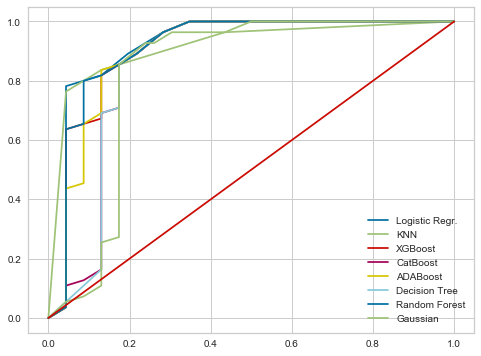

In [73]:
from sklearn.metrics import auc, roc_auc_score, roc_curve

model_roc1c=roc_auc_score(y_test, y_pred1c)
model_roc2c=roc_auc_score(y_test, y_pred2c)
model_roc3c=roc_auc_score(y_test, y_pred3c)
model_roc4c=roc_auc_score(y_test, y_pred4c)
model_roc5c=roc_auc_score(y_test, y_pred5c)
model_roc6c=roc_auc_score(y_test, y_pred6c)
model_roc7c=roc_auc_score(y_test, y_pred7c)
#model_roc8=roc_auc_score(y_test, y_pred8)
model_roc9c=roc_auc_score(y_test, y_pred9c)
model_roc10c=roc_auc_score(y_test, y_pred10c)


fpr1c,tpr1c,thresholds1c=roc_curve(y_test, model1c.predict_proba(X_test)[:,1])
fpr2c,tpr2c,thresholds1c=roc_curve(y_test, model2c.predict_proba(X_test)[:,1])
fpr3c,tpr3c,thresholds1=roc_curve(y_test, model3c.predict_proba(X_test)[:,1])
fpr4c,tpr4c,thresholds1c=roc_curve(y_test, model4c.predict_proba(X_test)[:,1])
fpr5c,tpr5c,thresholds1=roc_curve(y_test, model5c.predict_proba(X_test)[:,1])
fpr6c,tpr6c,thresholds1c=roc_curve(y_test, model6c.predict_proba(X_test)[:,1])
fpr7c,tpr7c,thresholds1c=roc_curve(y_test, model7c.predict_proba(X_test)[:,1])
#fpr8,tpr8,thresholds1=roc_curve(y_test, model8.predict_proba(X_test)[:,1])
fpr9c,tpr9c,thresholds1c=roc_curve(y_test, model9c.predict_proba(X_test)[:,1])
#fpr10c,tp10c,thresholds1c=roc_curve(y_test, model10c.predict_proba(X_test)[:,1])


plt.figure(figsize=(8,6))
plt.plot(fpr1c,tpr1c, label=f'Logistic Regr.')
plt.plot(fpr2c,tpr2c, label=f'KNN')
plt.plot(fpr3c,tpr3c, label=f'XGBoost')
plt.plot(fpr4c,tpr4c, label=f'CatBoost')
plt.plot(fpr5c,tpr5c, label=f'ADABoost')
plt.plot(fpr6c,tpr6c, label=f'Decision Tree')
plt.plot(fpr7c,tpr7c, label=f'Random Forest')
plt.plot(fpr9c,tpr9c, label=f'Gaussian')
#plt.plot(fpr10,tpr10, label=f'NuSVC')


plt.plot([0,1],[0,1])
plt.legend()
plt.show()

In [74]:
models = [('Logistic Regression', acc1c, rec1c, pr1c, f11c, model_roc1c),
          ('K-Nearest Neighbors',acc2c, rec2c, pr2c, f12c, model_roc2c),
          ('XGBoost', acc3c, rec3c, pr3c, f13c, model_roc3c),
          ('CatBoost', acc4c, rec4c, pr4c, f14c, model_roc4c),
          ('ADABoost', acc5c, rec5c, pr5c, f15c, model_roc5c),
          ('Decision Tree', acc6c, rec6c, pr6c, f16c, model_roc6c),
          ('Random Forest', acc7c, rec7c, pr7c, f17c, model_roc7c),
          ('Gaussian', acc9c, rec9c, pr9c, f19c, model_roc9c),
          ('NuSVC', acc10c, rec10c, pr10c, f110c, model_roc10c)]
           
           
           
models_results = pd.DataFrame(data = models, columns=['Model', 'ACC', 'REC', 'PR', 'F1', 'ROC'])
models_results.sort_values(['REC'], ascending=False)

,Model,ACC,REC,PR,F1,ROC
8,NuSVC,0.545,1.000,0.545,0.705,0.500000
7,Gaussian,0.851,0.927,0.823,0.872,0.844071
3,CatBoost,0.842,0.891,0.831,0.860,0.836759
5,Decision Tree,0.842,0.891,0.831,0.860,0.836759
6,Random Forest,0.842,0.891,0.831,0.860,0.836759
2,XGBoost,0.842,0.855,0.855,0.855,0.840316
4,ADABoost,0.842,0.855,0.855,0.855,0.840316
1,K-Nearest Neighbors,0.851,0.836,0.885,0.860,0.852964
0,Logistic Regression,0.842,0.818,0.882,0.849,0.843874


# Model choosing

In [82]:
# GaussianNB

In [ ]:
# Logistic Regression

# Features importance

In [ ]:
# feature importance is not very visible in gaussian so I will try to see it in other models

In [75]:
feature_names = ['cp_1', 'cp_2', 'cp_3', 'thal_2', 'clust.0', 'clust.1']
eli5.show_weights(model5,feature_names = feature_names)

Weight,Feature
0.2400 ± 0.8542,cp_1
0.2000 ± 0.8000,thal_2
0.1800 ± 0.7684,cp_2
0.1400 ± 0.6940,clust.0
0.1200 ± 0.6499,clust.1
0.1200 ± 0.6499,cp_3
